In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import stumpy

Time Series Chains

Time series chains are like motifs that evolve and drift over time

A Time series chain can be visualized as a set of motifs that have a close match in some direction, for example the red/green arrows below:

<Axes: >

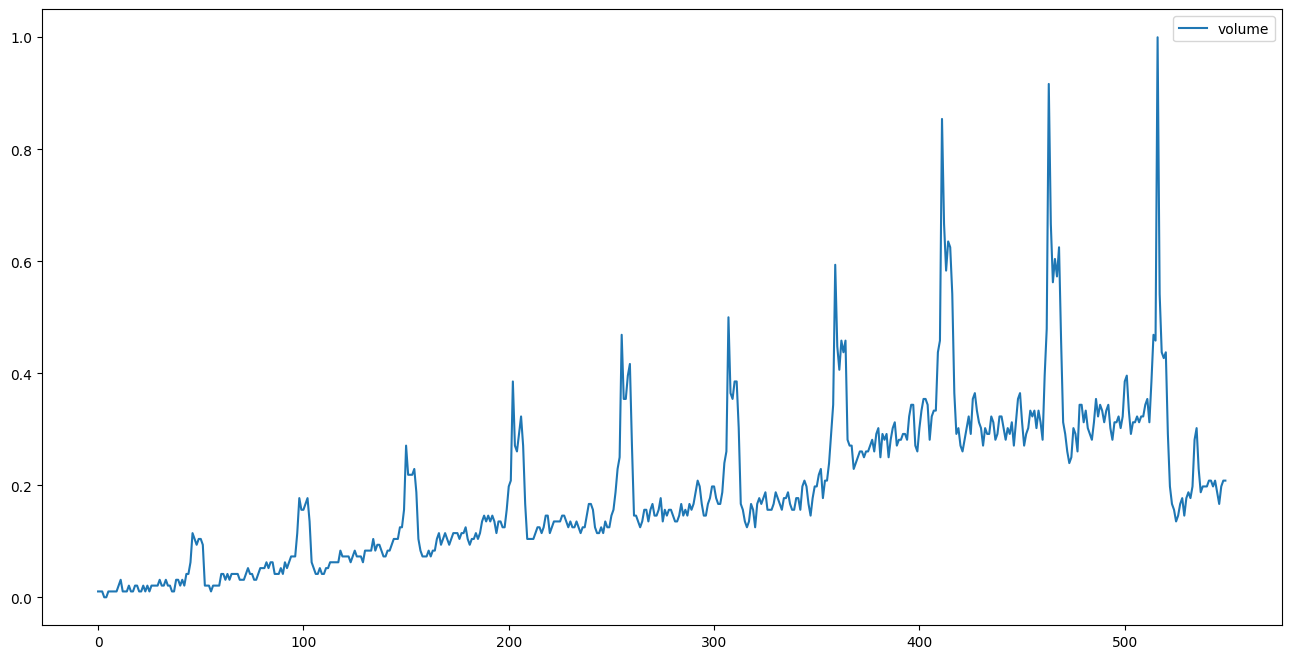

In [2]:
df_search = pd.read_csv("https://zenodo.org/record/4276348/files/Time_Series_Chains_Kohls_data.csv?download=1")

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=df_search, ax=ax)

In [3]:
m = 20
mp_search = stumpy.stump(df_search['volume'], m=m)

mp_search_df = pd.DataFrame(mp_search, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
mp_search_df.head()

,profile,profile index,left profile index,right profile index
0,3.329265,490,-1,490
1,3.079098,209,-1,209
2,2.904647,210,-1,210
3,2.640721,211,-1,211
4,2.898221,212,-1,212


<Axes: >

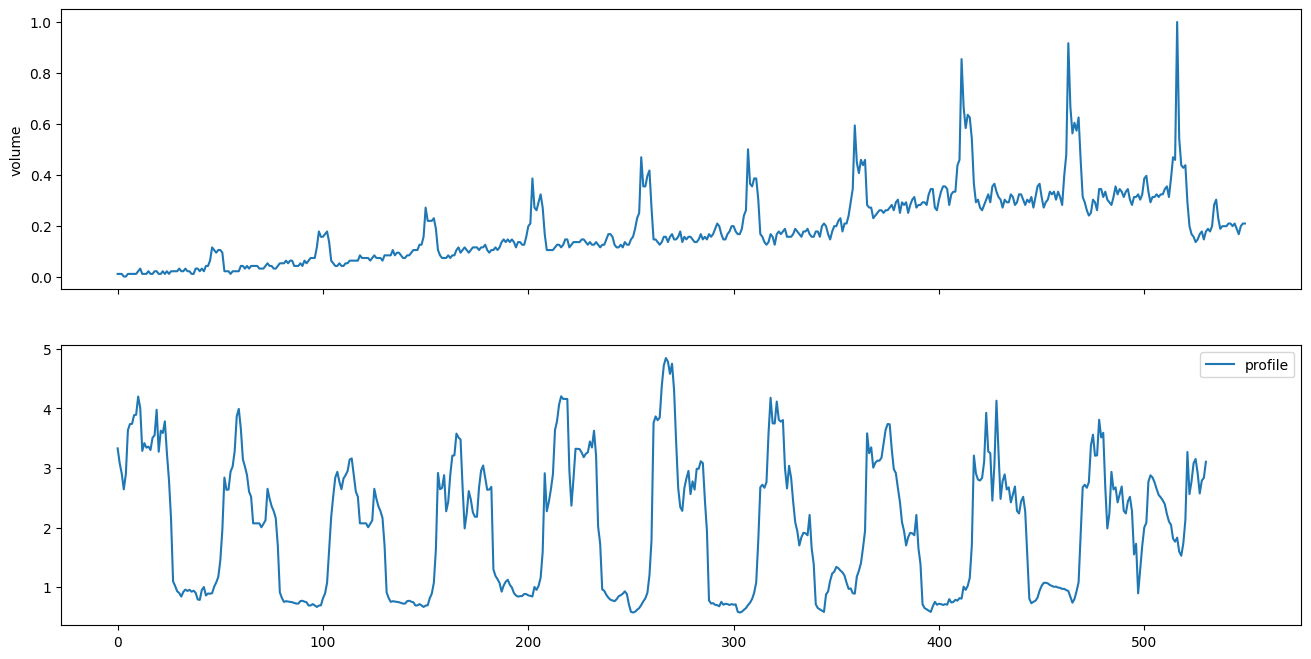

In [4]:
fig, ax = plt.subplots(2, figsize=(16,8), sharex=True)

sns.lineplot(data=df_search['volume'], ax=ax[0])
sns.lineplot(data=mp_search_df[['profile']], ax=ax[1])

In [5]:
all_chain_set, unanchored_chain = stumpy.allc(mp_search[:, 2], mp_search[:, 3])

unanchored_chain

array([ 35,  87, 139, 244, 296, 400, 452])

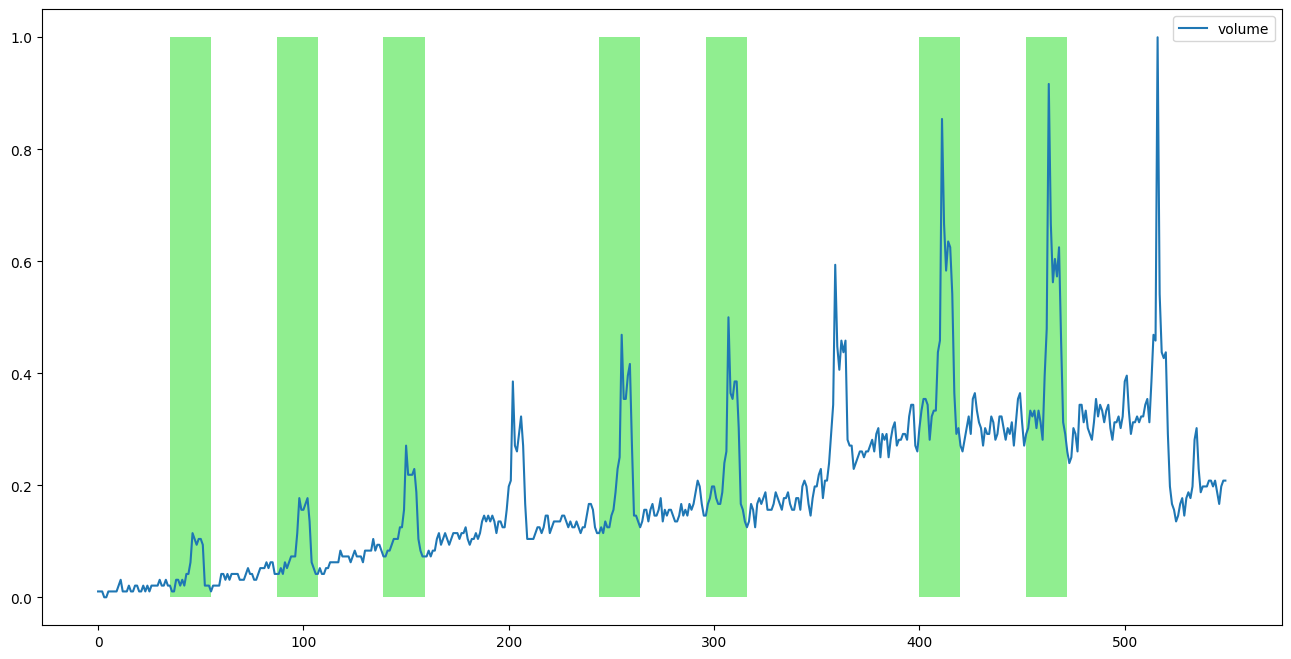

In [6]:


fig, ax = plt.subplots(figsize=(16,8), sharex=True)

sns.lineplot(data=df_search)

for idx in unanchored_chain:
    rect = Rectangle((idx, 0), m, 1, facecolor="lightgreen")
    ax.add_patch(rect)

